# Install and Import Libraries

In [1]:
!pip install pandas matplotlib seaborn lxml numpy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Abdo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:


# Import necessary libraries
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualizations for better aesthetics
sns.set(style="whitegrid")


# Data Extraction

In [3]:
# Load and parse the XML file
file_path = 'tripinfo20traci.xml'
tree = ET.parse(file_path)
root = tree.getroot()


In [4]:
# Extract all available columns from <tripinfo> into a list of dictionaries
data = []
for trip in root.findall('tripinfo'):
    data.append({
        'id': trip.get('id'),
        'depart': float(trip.get('depart')),
        'arrival': float(trip.get('arrival')),
        'duration': float(trip.get('duration')),
        'routeLength': float(trip.get('routeLength')),
        'waitingTime': float(trip.get('waitingTime')),
        'timeLoss': float(trip.get('timeLoss')),
        'departLane': trip.get('departLane'),
        'arrivalLane': trip.get('arrivalLane'),
        'devices': trip.get('devices'),
        'vType': trip.get('vType'),
        'rerouteNo': int(trip.get('rerouteNo')) if trip.get('rerouteNo') else np.nan,
        'departSpeed': float(trip.get('departSpeed')) if trip.get('departSpeed') else np.nan,
        'arrivalSpeed': float(trip.get('arrivalSpeed')) if trip.get('arrivalSpeed') else np.nan,
    })

# Convert list of dictionaries to a DataFrame
df = pd.DataFrame(data)

# Preview the extracted data
print("Extracted Data Preview:")
df


Extracted Data Preview:


,id,depart,arrival,duration,routeLength,waitingTime,timeLoss,departLane,arrivalLane,devices,vType,rerouteNo,departSpeed,arrivalSpeed
0,veh140,44.0,82.0,38.0,410.67,0.0,5.14,239353258#1_0,7546429#11_0,tripinfo_veh140 routing_veh140,veh_passenger,1,0.00,12.43
1,veh39,13.0,133.0,120.0,1213.41,1.0,17.95,7516981#12_0,7515979#16_0,tripinfo_veh39 routing_veh39,veh_passenger,1,0.00,8.79
2,veh50,16.0,136.0,120.0,1049.33,0.0,13.66,7331866#0_0,430014571#0_0,tripinfo_veh50 routing_veh50,veh_passenger,1,7.30,11.87
3,veh20,7.0,148.0,141.0,1815.08,0.0,17.99,7332973#3_0,27628545#1_0,tripinfo_veh20 routing_veh20,veh_passenger,1,0.00,13.87
4,veh78,25.0,157.0,132.0,967.77,20.0,40.31,-7511797#9_0,-7511774#9_0,tripinfo_veh78 routing_veh78,veh_passenger,1,0.00,7.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3343,veh4679,1442.0,2496.0,1054.0,11291.30,231.0,394.04,7329666#3_0,7519637#2_0,tripinfo_veh4679 routing_veh4679,veh_passenger,1,0.00,6.44
3344,truck4716,2180.0,2496.0,316.0,1946.77,94.0,130.12,-275095908#1_0,-7510696#11_0,tripinfo_truck4716 routing_truck4716,truck_truck,1,0.00,7.41
3345,veh2686,828.0,2498.0,1670.0,14586.84,317.0,594.05,-7546659_0,7332067#6_0,tripinfo_veh2686 routing_veh2686,veh_passenger,1,0.00,6.42
3346,bus1382,1278.0,2498.0,1220.0,10092.94,377.0,575.86,7510231#10_0,7545999_0,tripinfo_bus1382 routing_bus1382,bus_bus,1,0.00,4.02


# Data cleaning  

- 1 | Remove Unnecessary Columns

In [13]:

columns_to_drop = ['id','departLane', 'arrivalLane', 'devices']
df_cleaned = df.drop(columns=columns_to_drop, axis=1)

# Confirm remaining columns
print("Remaining Columns After Dropping Unnecessary Ones:")
df_cleaned


Remaining Columns After Dropping Unnecessary Ones:


,depart,arrival,duration,routeLength,waitingTime,timeLoss,vType,rerouteNo,departSpeed,arrivalSpeed
0,44.0,82.0,38.0,410.67,0.0,5.14,veh_passenger,1,0.00,12.43
1,13.0,133.0,120.0,1213.41,1.0,17.95,veh_passenger,1,0.00,8.79
2,16.0,136.0,120.0,1049.33,0.0,13.66,veh_passenger,1,7.30,11.87
3,7.0,148.0,141.0,1815.08,0.0,17.99,veh_passenger,1,0.00,13.87
4,25.0,157.0,132.0,967.77,20.0,40.31,veh_passenger,1,0.00,7.74
...,...,...,...,...,...,...,...,...,...,...
3343,1442.0,2496.0,1054.0,11291.30,231.0,394.04,veh_passenger,1,0.00,6.44
3344,2180.0,2496.0,316.0,1946.77,94.0,130.12,truck_truck,1,0.00,7.41
3345,828.0,2498.0,1670.0,14586.84,317.0,594.05,veh_passenger,1,0.00,6.42
3346,1278.0,2498.0,1220.0,10092.94,377.0,575.86,bus_bus,1,0.00,4.02


In [14]:
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3348 entries, 0 to 3347
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   depart        3348 non-null   float64
 1   arrival       3348 non-null   float64
 2   duration      3348 non-null   float64
 3   routeLength   3348 non-null   float64
 4   waitingTime   3348 non-null   float64
 5   timeLoss      3348 non-null   float64
 6   vType         3348 non-null   object 
 7   rerouteNo     3348 non-null   int64  
 8   departSpeed   3348 non-null   float64
 9   arrivalSpeed  3348 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 261.7+ KB


In [15]:
df_cleaned.describe()

,depart,arrival,duration,routeLength,waitingTime,timeLoss,rerouteNo,departSpeed,arrivalSpeed
count,3348.000000,3348.000000,3348.000000,3348.00000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000
mean,959.772999,1510.597969,550.824970,5547.73779,101.116189,185.848686,1.003883,1.383211,9.722835
std,627.560622,625.854017,336.704427,3997.93796,167.542393,194.731431,0.096161,3.976872,4.003905
min,0.000000,82.000000,38.000000,38.29000,0.000000,3.140000,0.000000,0.000000,0.000000
25%,353.750000,993.500000,298.750000,2188.82500,10.000000,67.812500,1.000000,0.000000,7.560000
50%,1049.000000,1573.500000,502.000000,4796.25000,43.000000,129.915000,1.000000,0.000000,8.220000
75%,1397.250000,2055.000000,748.000000,8078.21000,108.250000,232.415000,1.000000,0.000000,12.252500
max,2410.000000,2499.000000,2330.000000,24610.20000,1792.000000,1930.920000,4.000000,36.110000,32.860000


- 2 | Check for Missing Values

In [16]:

missing_values = df_cleaned.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)



Missing Values in Each Column:
depart          0
arrival         0
duration        0
routeLength     0
waitingTime     0
timeLoss        0
vType           0
rerouteNo       0
departSpeed     0
arrivalSpeed    0
dtype: int64


- 3 | Handle Missing Values 
    - here because null values are zero for this dont need handle missing value  

In [17]:
# Fill missing values with median for numerical columns
#df_cleaned.fillna(df_cleaned.median(), inplace=True)

# Verify no missing values remain

#print("Missing Values After Cleaning:")
#print(df_cleaned.isnull().sum())


- 4  | Check for Duplicate Rows

In [18]:
# Check for duplicate rows
duplicates = df_cleaned.duplicated().sum()
print(f"Number of Duplicate Rows: {duplicates}")

# Drop duplicates if any
#df_cleaned = df_cleaned.drop_duplicates()
#print("Duplicates removed.")


Number of Duplicate Rows: 0


# Outlier Detection and Treatment

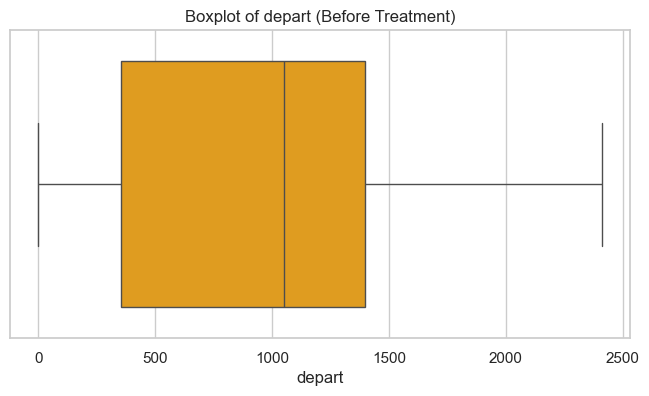

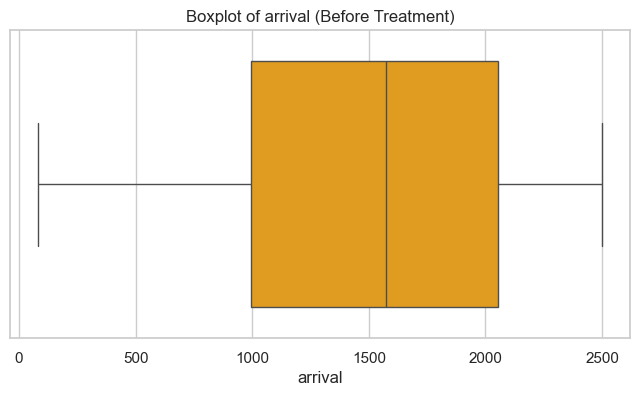

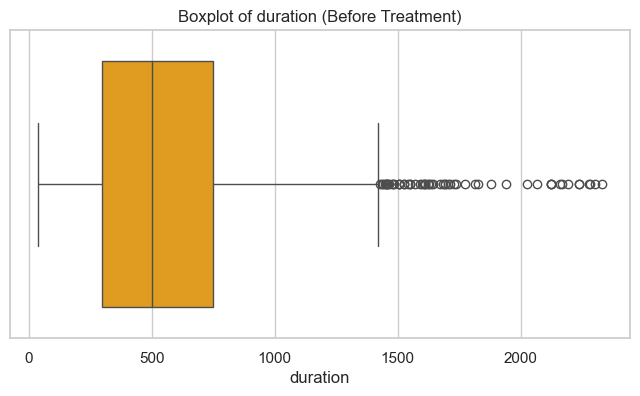

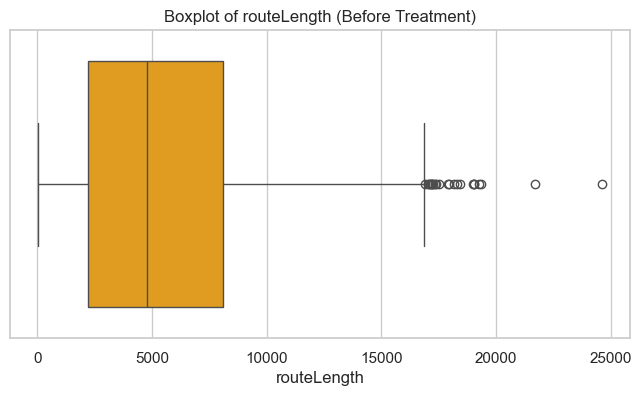

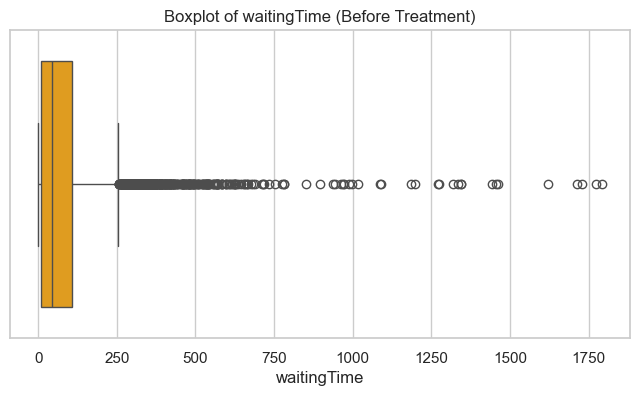

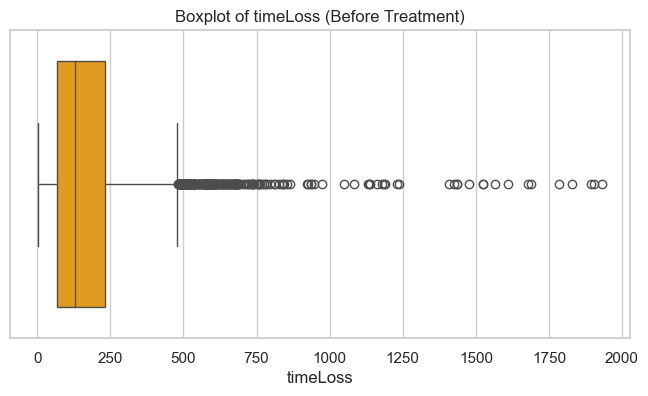

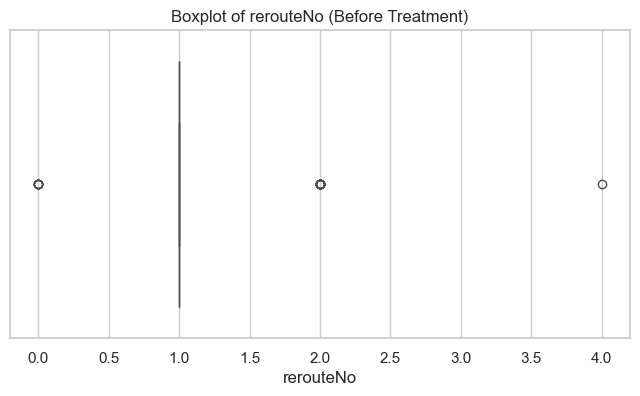

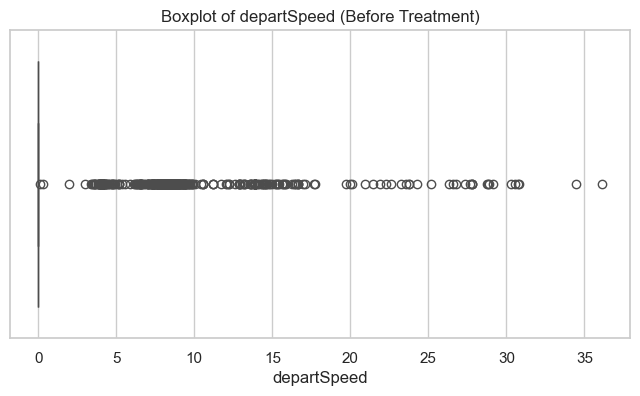

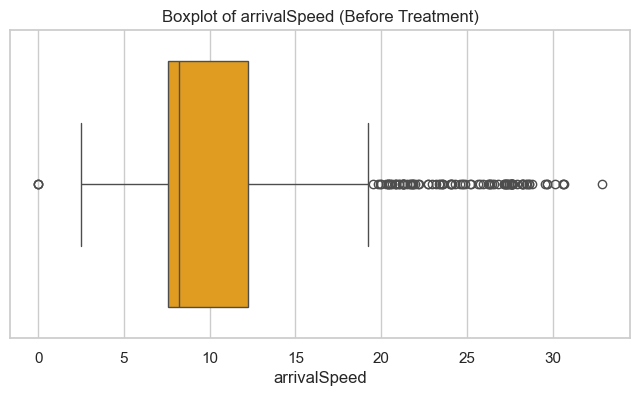

In [ ]:
# Plot boxplots for all numeric columns (before treatment)
num_cols = df_cleaned.select_dtypes(include='number').columns
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot( x=df_cleaned[col], color='orange')
    plt.title(f'Boxplot of {col} (Before Treatment)')
    plt.xlabel(col)
    plt.savefig(f'{col}_before_outlier_treatment.png')  # Save the plot as an image
    plt.show()



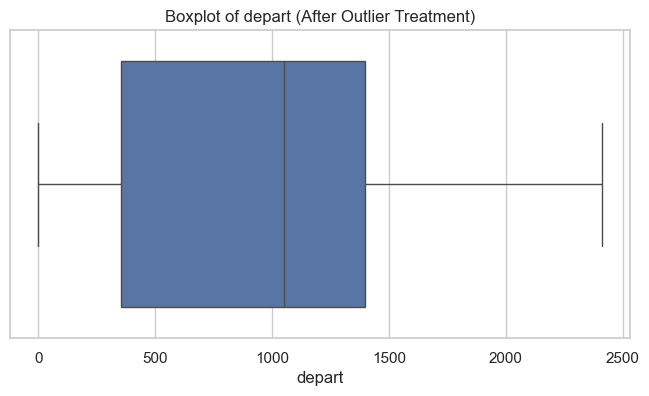

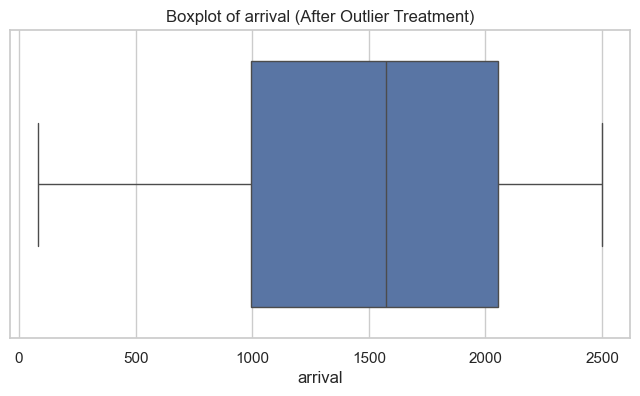

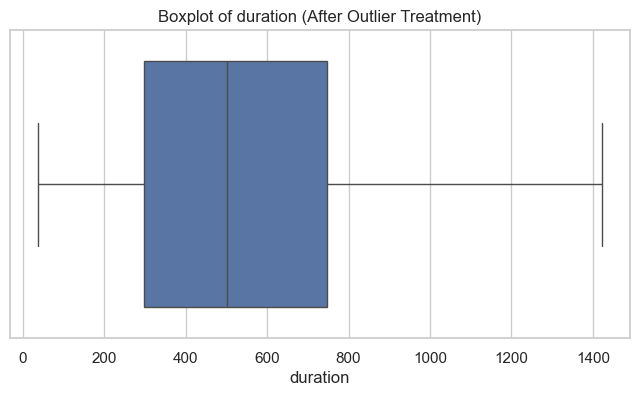

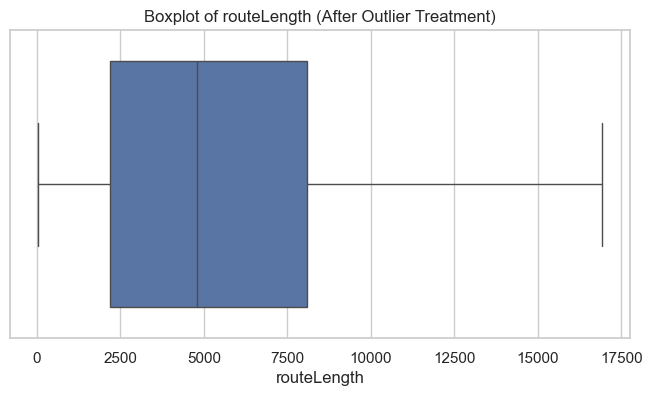

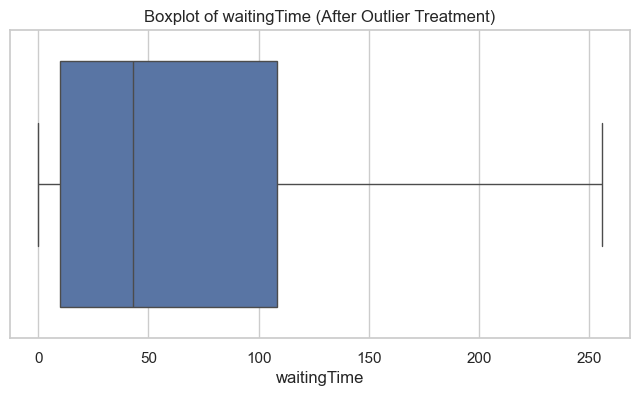

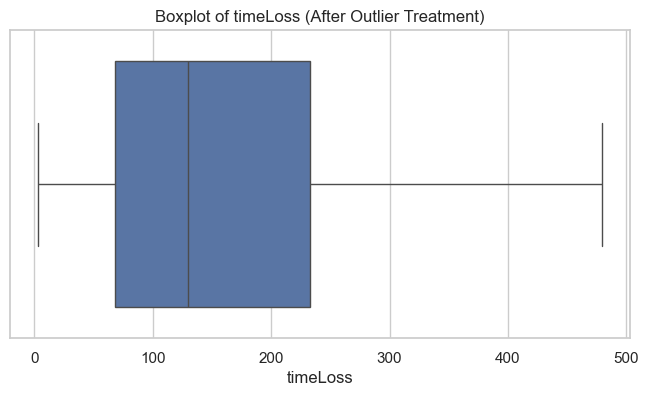

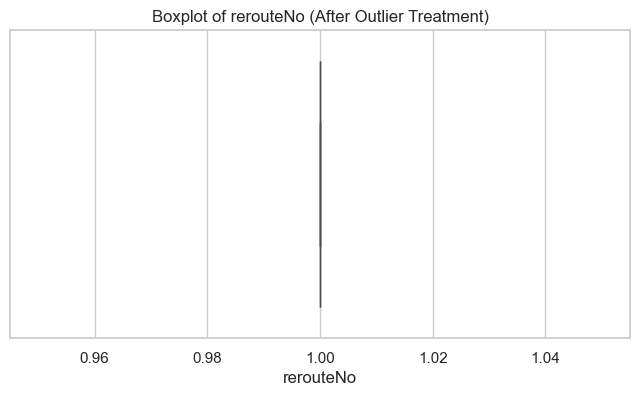

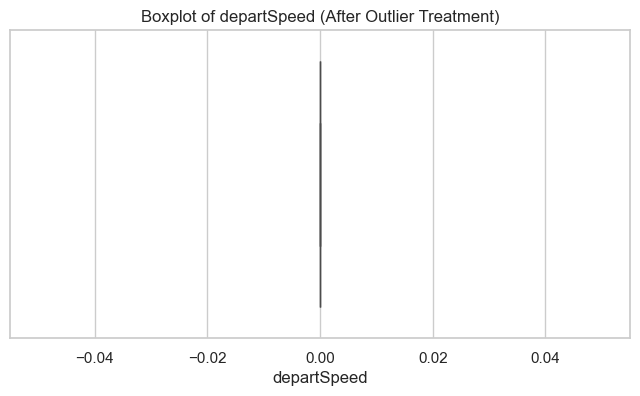

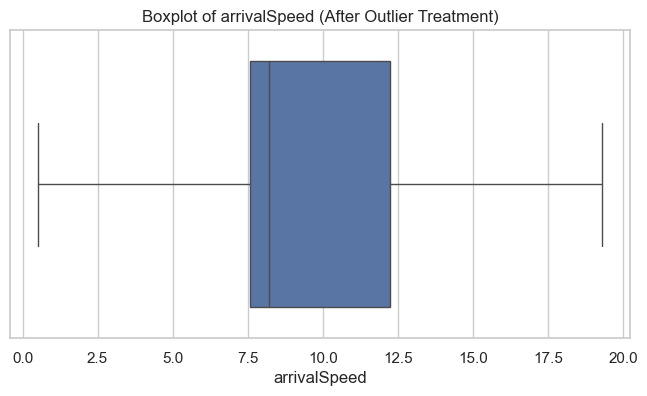

In [11]:
# Apply IQR method for outlier adjustment
for col in num_cols:
    q1 = df_cleaned[col].quantile(0.25)
    q3 = df_cleaned[col].quantile(0.75)
    iqr = q3 - q1

    # Define upper and lower bounds
    upper = q3 + (1.5 * iqr)
    lower = q1 - (1.5 * iqr)

    # Adjust outliers
    df_cleaned.loc[df_cleaned[col] > upper, col] = upper
    df_cleaned.loc[df_cleaned[col] < lower, col] = lower

    # Plot the boxplot for the column
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'Boxplot of {col} (After Outlier Treatment)')
    plt.savefig(f'outliers of {col} after treat.png')
    plt.show()

# Visualization

- Heatmap of Correlations

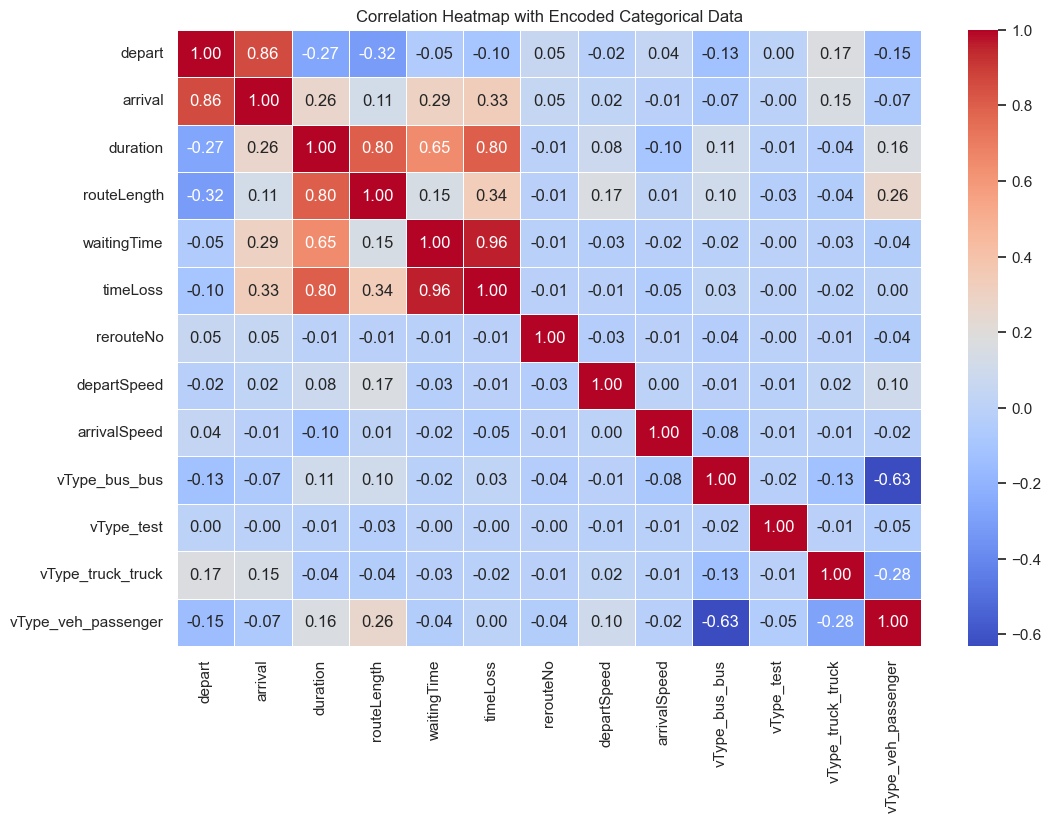

In [19]:
# Generate a heatmap for correlation analysis
# Encode categorical column 'vType' using one-hot encoding
df_encoded = pd.get_dummies(df_cleaned, columns=['vType'], drop_first=True)

# Generate correlation matrix for numeric and encoded columns
correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap with Encoded Categorical Data')
plt.show()


-  distributions for each numeric column


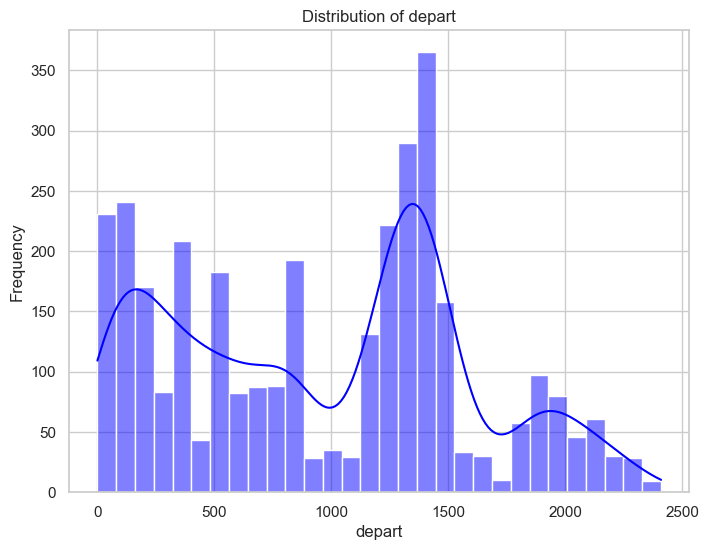

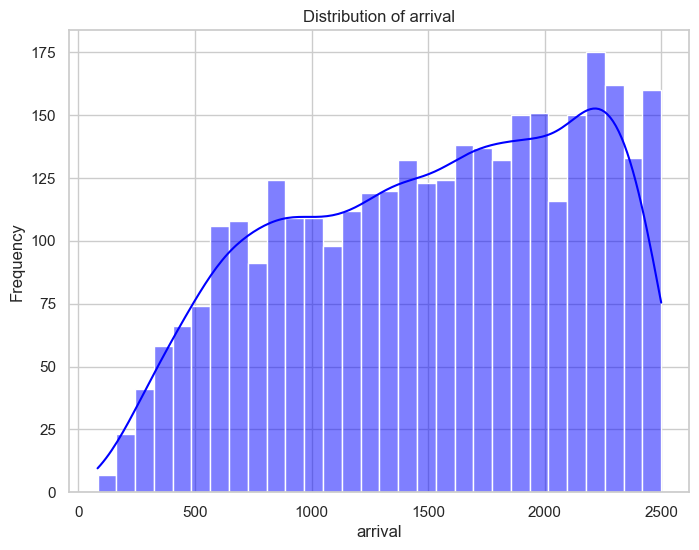

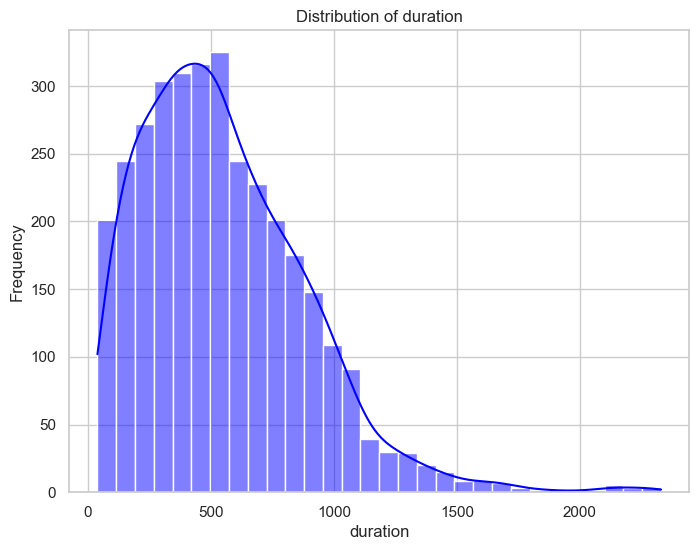

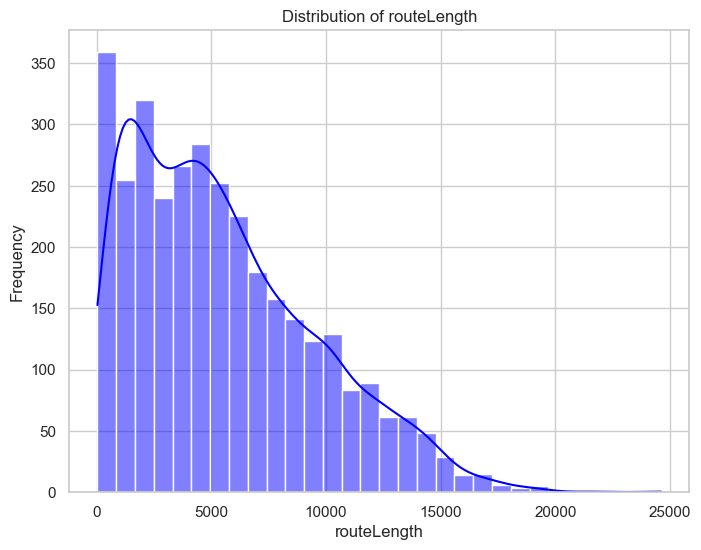

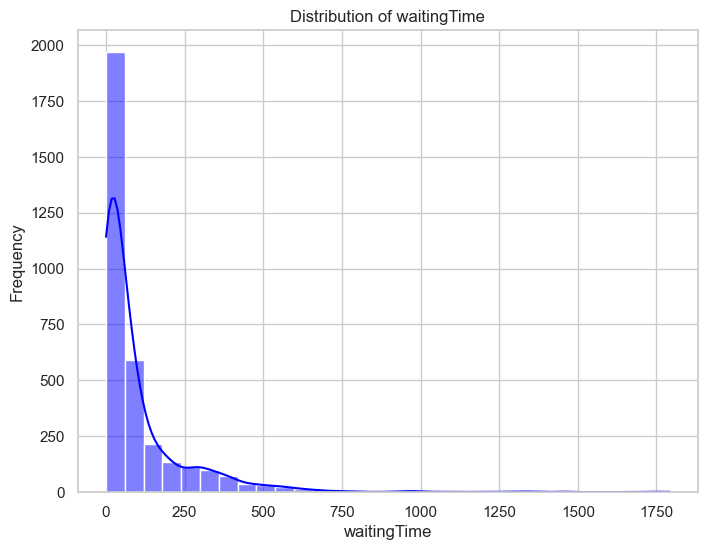

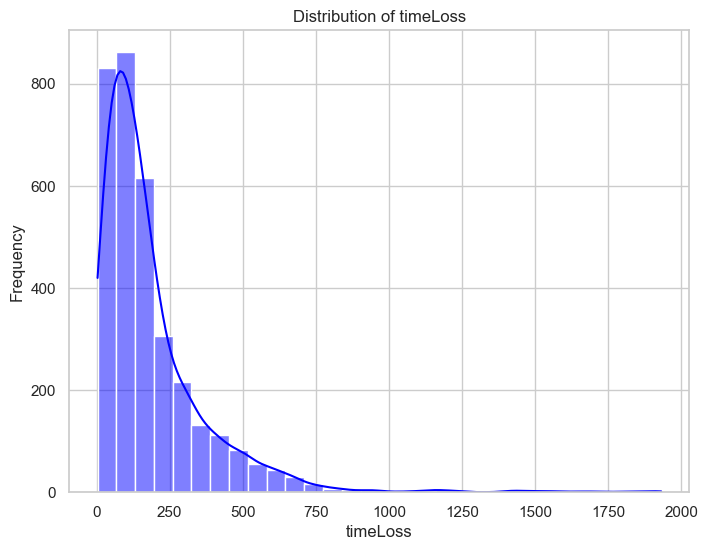

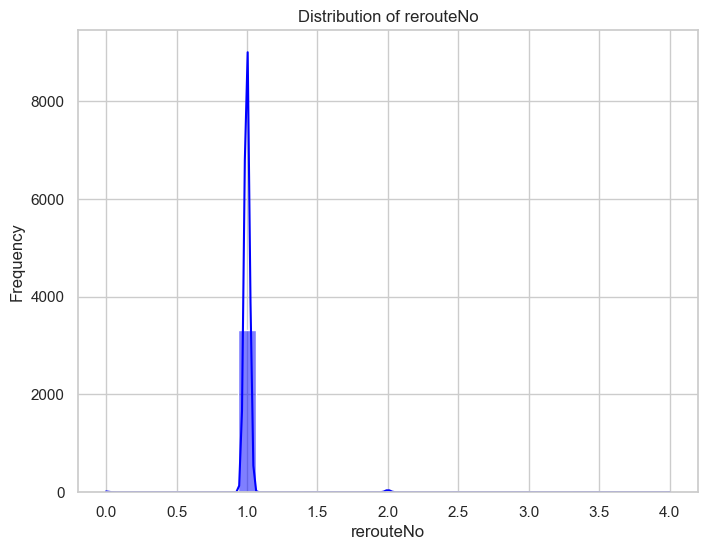

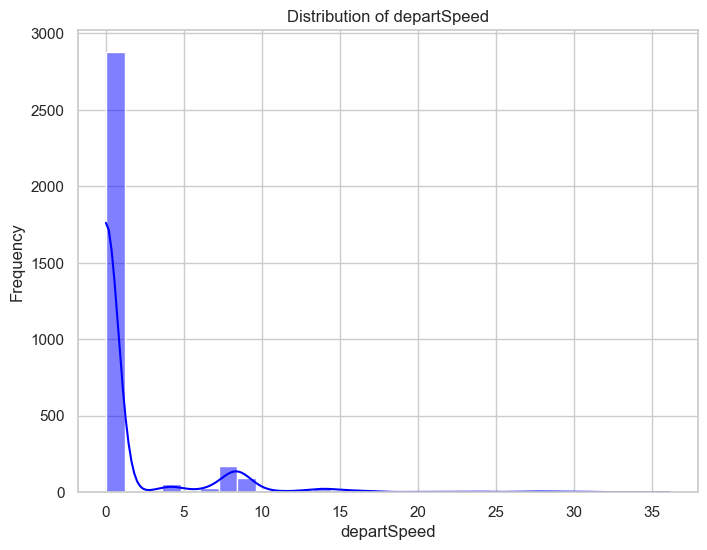

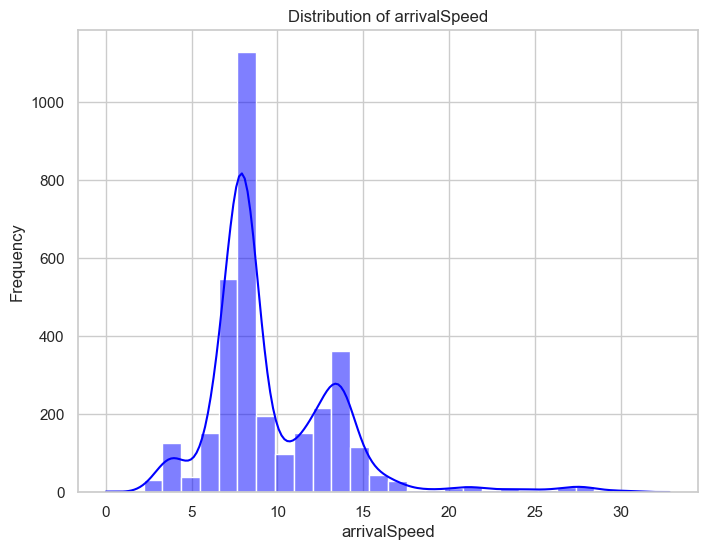

In [20]:
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_cleaned[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.savefig(F'distribution of {col}.png')
    plt.show()


# Save the Processed Data

In [22]:
# Save the cleaned and processed data to a CSV file
df_cleaned.to_csv('processed_tripinfo_20_trac.csv', index=False)
print("Cleaned and processed data saved to 'processed_tripinfo_20_trac.csv'.")


Cleaned and processed data saved to 'processed_tripinfo_20_trac.csv'.
